<a href="https://colab.research.google.com/github/junfrankohara/neutrophils_detection/blob/main/neutrophil_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install libraries to open virtual slides

!apt update && apt install -y openslide-tools
!pip install openslide-python

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,326 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,599 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe 

In [2]:
# Load the model and sample images from the git release
import urllib.request
%cd /content/
%mkdir demo
print("Downloading sample images...")
sample_url = "https://github.com/junfrankohara/neutrophils_detection/releases/download/sample_wsi/sample.ndpi"
urllib.request.urlretrieve(sample_url, './demo/sample.ndpi')
print("Downloading segmentation model...")
seg_url = "https://github.com/junfrankohara/neutrophils_detection/releases/download/model2/seg_model.pth"
urllib.request.urlretrieve(seg_url, './demo/seg_model.pth')
print("Downloading neutrophil detection model...")
detection_url = "https://github.com/junfrankohara/neutrophils_detection/releases/download/model/detection_model.pt"
urllib.request.urlretrieve(detection_url, './demo/neu_model.pt')
%ls /content/demo

/content
neu_model.pt  sample.ndpi  seg_model.pth


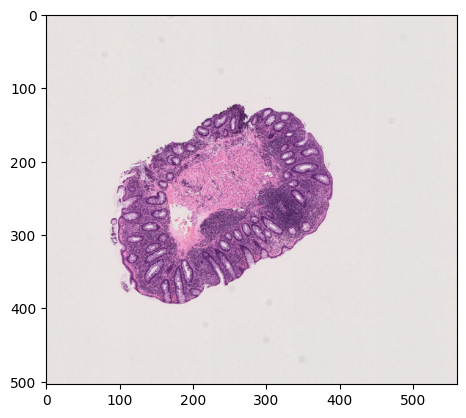

In [3]:
# Open and display the sample slide
import matplotlib.pyplot as plt
import openslide
import numpy as np

wsi = '/content/demo/sample.ndpi'
slide = openslide.open_slide(wsi)
shapes=list(slide.level_dimensions)
level5=slide.read_region((0,0), 5, shapes[5])
image = np.array(level5)
image=image[:,:,0:3]
small_img = np.array(image)
plt.imshow(small_img)

In [5]:
# Install libraries for segmentation and object detection
!pip install segmentation_models_pytorch==0.2.1
!pip install Pillow==10.0.1
!git clone https://github.com/ultralytics/yolov5
%cd /content/yolov5/
!pip install -qr requirements.txt
!pip install fpdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 5.8 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12403 sha256=48fb9a238f73f34c6bff052d8c6c10e1803386f39014d54ebe73ec91a79f4e99
  Stored in directory: /root/.cache/pip/wheels/61/3a/b0/0b4c443c380bd934701b0a25e4aed76479e4fcaf1a6f955664
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=8937feb3c5fa15f6eee60f31f1776dba0f103f1ca90661ff7ea8950e7fecc691
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch pretrainedmodels
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 

Cloning into 'yolov5'...
remote: Enumerating objects: 16114, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16114 (delta 8), reused 10 (delta 1), pack-reused 16089
Receiving objects: 100% (16114/16114), 14.79 MiB | 6.81 MiB/s, done.
Resolving deltas: 100% (11032/11032), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40703 sha256=54b01e37144186a335bb42abfdb1158243e9bc47826a61434156a0e221cfc84b
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [6]:
# Load the segmentation model
import segmentation_models_pytorch as smp
import torch
from tqdm import tqdm
from PIL import Image
import cv2



ENCODER = "efficientnet-b4"
ENCODER_WEIGHTS = "imagenet"
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)
DEVICE = "cuda"
seg_model = torch.load('/content/demo/seg_model.pth')

%cd /content/yolov5/
# Load the neutrophil detection model and set the threshold
neu_model = torch.hub.load("", "custom", path='/content/demo/neu_model.pt', source="local")
neu_model.conf = 0.5

/content/yolov5


YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
Adding AutoShape... 


In [7]:
# Load necessary libraries and functions

def crop_image_to_patches(img, patch_size=640):
    """
    Crop the input image into patches of the specified size.

    Parameters:
    - img: Input image as a NumPy array.
    - patch_size: Size of the square patches. Default is 640.

    Returns:
    A 4D NumPy array containing the cropped patches.
    """

    # Ensure the image dimensions are divisible by the patch size
    num_rows = img.shape[0] // patch_size
    num_cols = img.shape[1] // patch_size

    # Reshape the image into patches
    crop_array = img.reshape(num_rows, patch_size, num_cols, patch_size, 3)

    # Transpose the dimensions to rearrange the patches
    crop_array = crop_array.transpose([0, 2, 1, 3, 4])

    # Flatten the array to get the final result
    crop_array = crop_array.reshape(-1, patch_size, patch_size, 3)

    return crop_array

# Example usage:
# image = np.random.rand(1920, 1280, 3)
# cropped_array = crop_image_to_patches(image)
# print(cropped_array.shape)

def assemble_segmented_image_from_masks(crop_arrays, img_height, img_width):
    """
    Assemble the image from the cropped patches.

    Parameters:
    - crop_arrays: 4D NumPy array containing cropped patches.
    - img_height: Height of the original image.
    - img_width: Width of the original image.

    Returns:
    A 2D NumPy array representing the assembled image.
    """

    # Reshape the cropped patches
    re_x = crop_arrays.reshape(int(img_height / 640), int(img_width / 640), 640, 640)

    # Transpose the dimensions to rearrange the patches
    re_x = re_x.transpose([0, 2, 1, 3])

    # Flatten the array to get the final assembled image
    assembled_segmented_image = re_x.reshape(img_height, img_width).astype("uint8")

    return assembled_segmented_image

# Example usage:
# assembled_image = assemble_image_from_patches(cropped_array, 1920, 1280)
# print(assembled_image.shape)

def adjust_image_to_tile_size(img, tile_size):
    """
    Adjust the image dimensions to be a multiple of the specified tile size.

    Parameters:
    - img: Input image as a NumPy array.
    - tile_size: Size of the square tiles.

    Returns:
    A modified image with dimensions adjusted to be a multiple of the tile size.
    """

    # Calculate the amount of space to add to make the horizontal image  dimensions divisible by tile_size
    add_space1 = np.zeros((img.shape[0], tile_size - img.shape[1] % tile_size, 3))

    # Stack the image with the additional space
    img = np.hstack((img, add_space1)).astype("uint8")

    # Calculate the amount of space to add to make the vertical image dimensions divisible by tile_size
    add_space2 = np.zeros((tile_size-img.shape[0]%tile_size, img.shape[1], 3))

    # Stack the image with the additional space
    img = np.vstack((img, add_space2)).astype("uint8")

    # Crop the image to ensure its dimensions are multiples of tile_size
    img = img[:int(img.shape[0] / tile_size) * tile_size, :int(img.shape[1] / tile_size) * tile_size, :]

    return img

# Example usage:
# adjusted_image = adjust_image_to_tile_size(input_image, 64)
# print(adjusted_image.shape)


def reconstruct_image_from_patches(crop_arrays, img_height, img_width, patch_size=160):
    """
    Reconstruct a color image from a set of cropped color patches.

    Parameters:
    - crop_arrays: 4D NumPy array containing cropped color patches.
    - img_height: Height of the original image.
    - img_width: Width of the original image.
    - patch_size: Size of the square patches. Default is 160.

    Returns:
    A 3D NumPy array representing the reconstructed color image.
    """

    # Reshape the cropped patches into a 5D array
    reshaped_patches = crop_arrays.reshape(int(img_height / patch_size), int(img_width / patch_size), patch_size, patch_size, 3)

    # Transpose the dimensions to rearrange the patches
    transposed_patches = reshaped_patches.transpose([0, 2, 1, 3, 4])

    # Flatten the array to get the final reconstructed color image
    reconstructed_image = transposed_patches.reshape(img_height, img_width, 3).astype("uint8")

    return reconstructed_image

# Example usage:
# reconstructed_image = reconstruct_image_from_patches(cropped_patches, 480, 640, patch_size=160)
# print(reconstructed_image.shape)


def crop_segmented_image_to_masks(segmented_image, tile_size):
    """
    Crop the input segmented image into tiles of the specified size.

    Parameters:
    - segmented_image: Input image as a NumPy array.
    - tile_size: Size of the square tiles.

    Returns:
    A 3D NumPy array containing the cropped tiles.
    """

    # Crop the image to ensure its dimensions are multiples of tile_size
    segmented_image = segmented_image[:int(segmented_image.shape[0] / tile_size) * tile_size, :int(segmented_image.shape[1] / tile_size) * tile_size]

    # Reshape the image into tiles
    crop_array = segmented_image.reshape(int(segmented_image.shape[0] / tile_size), tile_size, int(segmented_image.shape[1] / tile_size), tile_size)

    # Transpose the dimensions to rearrange the tiles
    crop_array = crop_array.transpose([0, 2, 1, 3])

    # Flatten the array to get the final result
    crop_array = crop_array.reshape(-1, tile_size, tile_size)

    return crop_array

# Example usage:
# cropped_tiles = crop_image_to_tiles(input_image, 64)
# print(cropped_tiles.shape)

#セグメンテーションモデル

class ImageProcessor:
    def __init__(self, model, device, preprocessing_fn):
        self.model = model
        self.device = device
        self.preprocessing_fn = preprocessing_fn

    def process_images(self, rgb_images):
        # Resize the images to 320x320 using anti-aliasing
        half_rgb_images = np.array([cv2.resize(rgb, dsize=(320, 320)) for rgb in rgb_images])

        # Apply preprocessing function to all images in the batch
        preprocessed_images = np.array([self.preprocessing_fn(img) for img in half_rgb_images])

        # Convert images to PyTorch tensor
        image_tensors = torch.from_numpy(preprocessed_images).to(self.device).permute(0, 3, 1, 2).float()

        # Inference using the model
        with torch.no_grad():
            predictions = self.model(image_tensors)

        # Convert predictions to NumPy array
        predictions = predictions.cpu().numpy()

        # Process epithelium predictions for all images in the batch
        pr_epithelium = np.where(predictions[:, 3, :, :] > 0.7, 1, 0)
        pr_epithelium = pr_epithelium.repeat(2, axis=1).repeat(2, axis=2)

        # Process stromal predictions for all images in the batch
        pr_strom = np.where(predictions[:, 2, :, :] > 0.7, 1, 0)
        pr_strom = pr_strom.repeat(2, axis=1).repeat(2, axis=2)

        return pr_epithelium, pr_strom



class NeutrophilProcessor:
    def __init__(self, slide, detect_model, patch_size=160):
        self.slide = slide
        self.detect_model = detect_model
        self.patch_size = patch_size

    def neutrophils_count(self, epi_masks, lamina_masks, adjusted_image, position):
        e_neurophils = 0
        l_neurophils = 0

        # Loop through each epithelium mask
        for i in tqdm(range(len(epi_masks))):

            # Processing of segmented areas
            if epi_masks[i].sum() + lamina_masks[i].sum() > 500:

                # Obtain the coordinates of the slide image corresponding to the mask
                width_bin = int(i % (adjusted_image.shape[1] / self.patch_size))
                height_bin = int(i // (adjusted_image.shape[1] / self.patch_size))
                crop_position = (int(position[1] * 32) + width_bin * 320, int(position[2] * 32 + height_bin * 320))

                # Read the region from the slide
                img = self.slide.read_region(crop_position, 0, (320, 320))
                img_array = np.array(img)[:, :, 0:3]


                # Resize the epithelium mask and lamina mask
                epi_mask_resized = cv2.resize(epi_masks[i], (320, 320))
                lamina_mask_resized = cv2.resize(lamina_masks[i], (320, 320))

                # Create an segmented epithelium tile and lamina tile using the resized mask
                epi_tile = img_array * np.stack([epi_mask_resized, epi_mask_resized, epi_mask_resized], axis=-1)
                lamina_tile = img_array * np.stack([lamina_mask_resized, lamina_mask_resized, lamina_mask_resized], axis=-1)

                # Run the detection model on the epithelium tile
                e_neu_neu_result = self.detect_model(epi_tile)
                e_neu_bb = e_neu_neu_result.xyxy[0].to('cpu').detach().numpy().copy()

                # Run the detection model on the lamina tile
                l_neu_result = self.detect_model(lamina_tile)
                l_neu_bb= l_neu_result.xyxy[0].to('cpu').detach().numpy().copy()

                # Count neurophils in epithelium and lamina propria
                e_neurophils= e_neurophils + (len(e_neu_bb))
                l_neurophils= l_neurophils + (len(l_neu_bb))

        return e_neurophils, l_neurophils




class NeutrophilProcessor:
    def __init__(self, slide, detect_model, patch_size=160):
        self.slide = slide
        self.detect_model = detect_model
        self.patch_size = patch_size

    def process_for_report(self, epi_masks, lamina_masks, adjusted_image, position):
        e_neutrophils = 0
        l_neutrophils = 0
        detect_tile = []
        e_confidence = []
        l_confidence = []

        # rectangle colors
        color1 = (0, 255, 0)
        color2 = (255, 0, 0)

        # Creating a red color filter: a 320x320 image with red color (255, 0, 0)
        red_fil = np.stack([np.ones((320, 320)), np.zeros((320, 320)), np.zeros((320, 320))], axis=-1) * 255

        # Creating a blue color filter: a 320x320 image with blue color (0, 0, 255)
        blue_fil = np.stack([np.zeros((320, 320)), np.zeros((320, 320)), np.ones((320, 320))], axis=-1) * 255

        # Loop through each epithelium mask
        for i in tqdm(range(len(epi_masks))):

            # Obtain the coordinates of the slide image corresponding to the mask
            width_bin = int(i % (adjusted_image.shape[1] / self.patch_size))
            height_bin = int(i // (adjusted_image.shape[1] / self.patch_size))
            crop_position = (int(position[0] * 32) + width_bin * 320, int(position[1] * 32 + height_bin * 320))

            # Read the region from the slide
            img = self.slide.read_region(crop_position, 0, (320, 320))
            img_array = np.array(img)[:, :, 0:3].astype("uint8")

            # Processing of segmented areas
            if epi_masks[i].sum() + lamina_masks[i].sum() > 1000:


                # Resize the epithelium mask and lamina mask
                epi_mask_resized = cv2.resize(epi_masks[i], (320, 320))
                lamina_mask_resized = cv2.resize(lamina_masks[i], (320, 320))

                # Create an segmented epithelium tile and lamina tile using the resized mask
                epi_tile = img_array * np.stack([epi_mask_resized, epi_mask_resized, epi_mask_resized], axis=-1)
                lamina_tile = img_array * np.stack([lamina_mask_resized, lamina_mask_resized, lamina_mask_resized], axis=-1)

                # Run the detection model on the epithelium tile
                e_neu_neu_result = self.detect_model(epi_tile)
                e_neu_bb = e_neu_neu_result.xyxy[0].to('cpu').detach().numpy().copy()

                # Run the detection model on the lamina tile
                l_neu_result = self.detect_model(lamina_tile)
                l_neu_bb = l_neu_result.xyxy[0].to('cpu').detach().numpy().copy()

                # Count neurophils in epithelium and lamina propria
                e_neutrophils= e_neutrophils + (len(e_neu_bb))
                l_neutrophils= l_neutrophils + (len(l_neu_bb))

                # Get Indicated tiles and confidence
                crop_e_confidence = [0]
                crop_l_confidence = [0]

                #　Draw rectangles
                for i in range(len(e_neu_bb)):
                    cv2.rectangle(img_array,(int(e_neu_bb[i][0]-3), int(e_neu_bb[i][1]-3)),(int(e_neu_bb[i][2]+3),int(e_neu_bb[i][3]+3)), color1, thickness=2)
                    crop_e_confidence.append(e_neu_bb[i][4])

                for i in range(len(l_neu_bb)):
                    cv2.rectangle(img_array,(int(l_neu_bb[i][0]-3), int(l_neu_bb[i][1]-3)),(int(l_neu_bb[i][2]+3),int(l_neu_bb[i][3]+3)), color2, thickness=2)
                    crop_l_confidence.append(l_neu_bb[i][4])

                # Indicate tiles with intraepithelial neutrophils red
                if len(e_neu_bb) > 0:
                    img_array = img_array*0.8 + red_fil*0.2
                    img_array = img_array.astype("uint8")


                # Indicate tiles with intraepithelial neutrophils blue
                if len(e_neu_bb) == 0 and len(l_neu_bb) > 0:
                    img_array = img_array*0.8 + blue_fil*0.2
                    img_array = img_array.astype("uint8")

                # Get the indicated tiles
                detect_tile.append(cv2.resize(img_array, dsize=(160, 160)))

                # Get the highest confidence value
                e_confidence.append(max(crop_e_confidence))
                l_confidence.append(max(crop_l_confidence))

            # Processing of unsegmented areas
            else:
                e_confidence.append(0)
                l_confidence.append(0)
                detect_tile.append(cv2.resize(img_array, dsize=(160, 160)))

        return e_neutrophils, l_neutrophils, detect_tile, e_confidence, l_confidence

In [9]:
# Detect neutrophils and generate report as PDF


# Set the ROI of the biopsy site using the contour detection feature of openCV
# Convert to binary for contour detection
im_gray = cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY)
ret2, th2 = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Invert binary values
th2[th2 == 0] = 1
th2[th2 == 255] = 0

# Extract contours.
contours, hierarchy = cv2.findContours(
    th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

# Draw rectangles around detected areas.
area_num = 5000
contours_filtered = list(filter(lambda x: cv2.contourArea(x) > area_num, contours))

# First, extract the first specimen at level 1
bx = 0

# Create a list of coordinates for the rectangles surrounding the detected specimens
specimen = []
for i in contours_filtered:
    x, y, width, height = cv2.boundingRect(i)
    specimen.append([x, y, width, height])

# Reorder the detected biopsy specimens from left to right
specimen = sorted(specimen)
position = specimen[bx]
sp1 = slide.read_region((position[0] * 32, position[1] * 32), 1, (position[2] * 16, position[3] * 16))
sp1_array = np.array(sp1)
sp1_array = np.array(sp1_array[:, :, 0:3])

# Adjust the image dimensions to be a multiple of the specified tile size(640pix).
adjusted_image = adjust_image_to_tile_size(sp1_array, 640)

# Crop the input image into patches of the specified size(640).
crop_array=crop_image_to_patches(adjusted_image)

# Assuming DEVICE, MODEL, and PREPROCESSING_FN are defined elsewhere in your code
# Create an instance of ImageProcessor
image_processor = ImageProcessor(model=seg_model, device=DEVICE, preprocessing_fn=preprocessing_fn)

# Process all images in crop_array at once
epithelium_list, strom_list = image_processor.process_images(crop_array)

# Conversion to NumPy array
epi_arrays = np.stack(epithelium_list)
strom_arrays = np.stack(strom_list)

# Assemble the image from the cropped patches.
detect_epi = assemble_segmented_image_from_masks(epi_arrays, adjusted_image.shape[0], adjusted_image.shape[1])
detect_lamina = assemble_segmented_image_from_masks(strom_arrays, adjusted_image.shape[0], adjusted_image.shape[1])


epi_masks = crop_segmented_image_to_masks(detect_epi, 160)
lamina_masks = crop_segmented_image_to_masks(detect_lamina, 160)

# Assuming WSI file and neutrophil detection model are defined elsewhere in your code
# Initialize the NeurophilProcessor
neutrophil_processor = NeutrophilProcessor(slide, neu_model)

# Process epithelium masks
neutrophils_count = neutrophil_processor.process_for_report(epi_masks, lamina_masks, adjusted_image, position)

detect_tile = neutrophils_count[2]
indicate_arrays=np.stack(detect_tile)
detect_img=reconstruct_image_from_patches(indicate_arrays, adjusted_image.shape[0], adjusted_image.shape[1])

# Select and save two high-confidence images
e_confidence = neutrophils_count[3]
e_high_conf = sorted(range(len(e_confidence)), key=lambda i: e_confidence[i], reverse=True)[:6]
l_confidence = neutrophils_count[4]
for ind in range(len(e_confidence)):
    if e_confidence[ind] > 0:
        l_confidence[ind] = 0
l_high_conf = sorted(range(len(l_confidence)), key=lambda i: l_confidence[i], reverse=True)[:6]

for i in range(2):
    image = detect_tile[e_high_conf[i]]
    corrected_image = image - np.stack([np.ones((160, 160))*255*0.2, np.zeros((160, 160)), np.zeros((160, 160))], axis=-1)
    corrected_image = corrected_image/0.8
    pil_image = Image.fromarray(corrected_image.astype("uint8"))
    pil_image.save('/content/demo/l_detect_crop' + str(i) + '.png')

for i in range(2):
    image = detect_tile[l_high_conf[i]]
    corrected_image = image - np.stack([np.zeros((160, 160)), np.zeros((160, 160)), np.ones((160, 160))*255*0.2], axis=-1)
    corrected_image = corrected_image/0.8
    pil_image = Image.fromarray(corrected_image.astype("uint8"))
    pil_image.save('/content/demo/e_detect_crop' + str(i) + '.png')

# Save the detected image
pil_image = Image.fromarray(detect_img[:sp1_array.shape[0], :sp1_array.shape[1], :])
pil_image.save('/content/demo/detect5579.png')



def phri_diagnosis(neutrophils_count):
    neutrophil_in_epi = round(neutrophils_count[0]*3000000/detect_epi.sum(), 1)
    if neutrophil_in_epi >= 6:
        return ["", "", "PHRI >= 2", " PHRI = 0", " PHRI = 1", ""]
    neutrophil_in_lamina = round(neutrophils_count[1]*3000000/detect_lamina.sum(), 1)
    if neutrophil_in_lamina >= 9:
        return ["", " PHRI = 1", "", " PHRI = 0", "", "PHRI >= 2"]
    else:
        return [" PHRI = 0", "", "", "", " PHRI = 1", "PHRI >= 2"]

def nancy_diagnosis(neutrophils_count):
    neutrophil_in_epi = round(neutrophils_count[0]*3000000/detect_epi.sum(), 1)
    neutrophil_in_lamina = round(neutrophils_count[1]*3000000/detect_lamina.sum(), 1)

    if neutrophil_in_epi + neutrophil_in_lamina >= 36:
        return ["", "", " NHI >= 3", " NHI <= 1", "  NHI = 2", ""]
    if neutrophil_in_epi >= 6:
        return ["", "  NHI = 2", "", " NHI <= 1", "", " NHI >= 3"]
    if neutrophil_in_lamina >= 9:
        return ["", "  NHI = 2", "", " NHI <= 1", "", " NHI >= 3"]
    else:
        return [" NHI <= 1", "", "", "", "  NHI = 2", " NHI >= 3"]

def indicate_epi_neutrophi_count(neutrophils_count):
    neutrophil_in_epi = round(neutrophils_count[0]*3000000/detect_epi.sum(), 1)

    if neutrophil_in_epi >= 6:
        return [str(neutrophils_count[0]), ""]
    else:
        return ["", str(neutrophil_in_epi)]

def indicate_lami_neutrophi_count(neutrophils_count):
    neutrophil_in_lamina = round(neutrophils_count[1]*3000000/detect_lamina.sum(), 1)

    if neutrophil_in_lamina >= 9:
        return [str(neutrophils_count[1]), ""]
    else:
        return ["", str(neutrophil_in_lamina)]

from fpdf import FPDF

pdf = FPDF(orientation = 'Portrait', unit = 'pt', format = 'A4')

pdf.add_page()


pdf.set_font('Arial', '', 20)
# pdf.set_text_color(255, 255, 255)

# set images
image_base = '/content/demo/detect.png'
photo = Image.fromarray(detect_img[:sp1_array.shape[0], :sp1_array.shape[1], :])
photo_resize = photo.resize((420, 420))
crop1 = '/content/demo/l_detect_crop0.png'
crop2 = '/content/demo/l_detect_crop1.png'
crop3 = '/content/demo/e_detect_crop0.png'
crop4 = '/content/demo/e_detect_crop1.png'
photo_resize.save(image_base)
pdf.image(image_base, x = 25, y = 40, w = 420, h = 420)
pdf.rect(463, 150, 115, 80, style = '')
pdf.rect(463, 260, 115, 80, style = '')
#pdf.rect(455, 100, 115, 300, style = '')
pdf.image(crop1, x = 25, y = 480, w = 160, h = 160)
pdf.image(crop2, x = 25, y = 660, w = 160, h = 160)
pdf.image(crop3, x = 205, y = 480, w = 160, h = 160)
pdf.image(crop4, x = 205, y = 660, w = 160, h = 160)

# Output diagnosis
NHI = nancy_diagnosis(neutrophils_count)
PHRI = phri_diagnosis(neutrophils_count)

# Indicate the relevant diagnosis in red
pdf.set_text_color(230, 0, 0)
pdf.text(420, 565, PHRI[0])
pdf.text(420, 605, PHRI[1])
pdf.text(420, 645, PHRI[2])
pdf.text(423, 685, NHI[0])
pdf.text(423, 725, NHI[1])
pdf.text(423, 765, NHI[2])

# Indicate the unrelevant diagnosis in gray
pdf.set_text_color(230, 230, 230)
pdf.text(420, 565, PHRI[3])
pdf.text(420, 605, PHRI[4])
pdf.text(420, 645, PHRI[5])
pdf.text(423, 685, NHI[3])
pdf.text(423, 725, NHI[4])
pdf.text(423, 765, NHI[5])

pdf.set_text_color(0, 0, 0)
pdf.set_font('Arial', '', 25)
pdf.text(75, 30, "Assessment of Ulcerative Colitis Activity")
pdf.set_font('Arial', '', 15)
pdf.text(463, 130, "Neutrophil Count")
pdf.set_font('Arial', '', 12)
pdf.text(485, 170, "in Epithelium")
pdf.text(475, 280, "in Lamina propria")
pdf.set_font('Arial', '', 30)

# Indicate neutrophils count
pdf.set_text_color(230, 0, 0)
pdf.text(498, 205,  indicate_epi_neutrophi_count(neutrophils_count)[0])
pdf.text(498, 315,  indicate_lami_neutrophi_count(neutrophils_count)[0])
pdf.set_text_color(230, 230, 230)
pdf.text(498, 205,  indicate_epi_neutrophi_count(neutrophils_count)[1])
pdf.text(498, 315,  indicate_lami_neutrophi_count(neutrophils_count)[1])

pdf.set_font('Arial', '', 15)
pdf.text(390, 525, "Diagnosis: ")
pdf.rect(380, 505, 175, 285, style = '')

pdf.output('PDF_Report.pdf')

# Display PDF
from google.colab import files
files.download('PDF_Report.pdf')

100%|██████████| 896/896 [00:42<00:00, 21.02it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>